# **Question 3**

In [8]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


In [28]:
print(X)
print(y)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1       

# Label Encoding

In [ ]:
#print(X.columns)
from sklearn.preprocessing import LabelEncoder
X = X.apply(LabelEncoder().fit_transform)
print("This is X")
print(X)
y = y.apply(LabelEncoder().fit_transform)
print("This is y")
print(y)

# Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

# Linear Regression

In [27]:
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.755390379821487


# ROC Curve

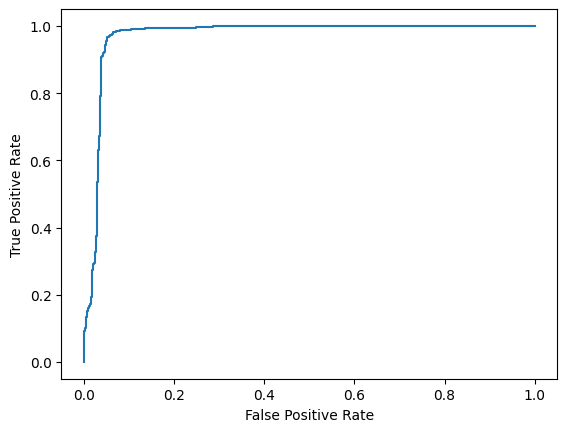

AUC: 0.971


In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred = regr.predict(X_test)[::]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

# PLA Model

In [75]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
#Making a perceptron classifier
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
#Finding accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9020187099950763


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# ROC Curve

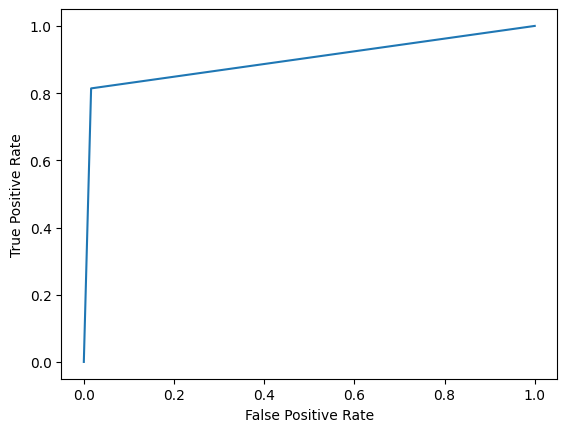

AUC: 0.899


In [76]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

# MLP Model

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=1000, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.00


# ROC Curve

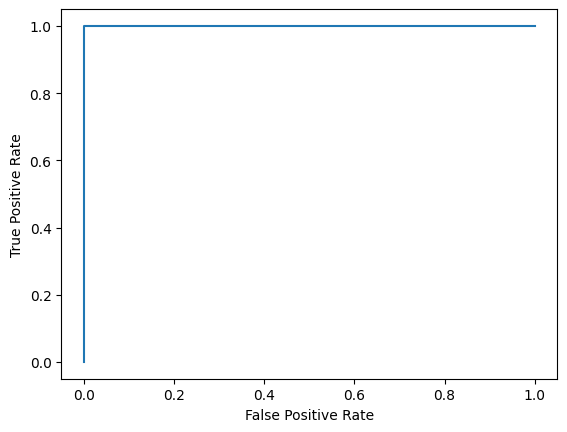

AUC: 1.000


In [78]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

# KNN Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
#Training the model

K = []
training = []
test = []
scores = {}


for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, np.ravel(y_train))

    training_score = clf.score(X_train, np.ravel(y_train))
    test_score = clf.score(X_test, np.ravel(y_test))
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
for keys, values in scores.items():
	print(keys, ':', values)


2 : [1.0, 1.0]
3 : [1.0, 1.0]
4 : [0.9998358772361726, 0.999507631708518]
5 : [1.0, 1.0]
6 : [0.9998358772361726, 0.999507631708518]
7 : [0.9998358772361726, 0.999507631708518]
8 : [0.9998358772361726, 0.999015263417036]
9 : [0.9998358772361726, 0.999015263417036]
10 : [0.9993435089446906, 0.9975381585425899]
11 : [0.9996717544723454, 0.999015263417036]
12 : [0.9993435089446906, 0.9975381585425899]
13 : [0.999507631708518, 0.9980305268340719]
14 : [0.9981946495978993, 0.9980305268340719]
15 : [0.9983587723617265, 0.9980305268340719]
16 : [0.9973740357787625, 0.9970457902511078]
17 : [0.9977022813064172, 0.9970457902511078]
18 : [0.9970457902511078, 0.9965534219596258]
19 : [0.9970457902511078, 0.9965534219596258]
20 : [0.9967175447234532, 0.9945839487936977]


# Graphs

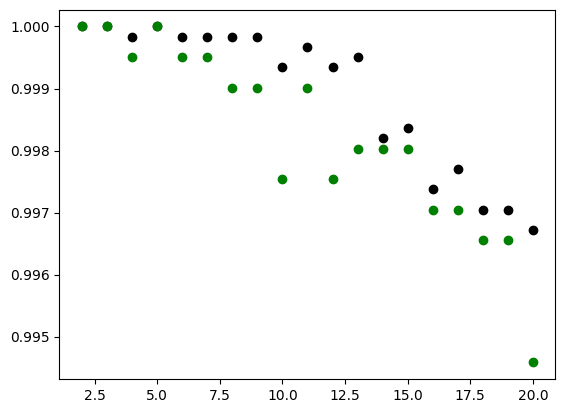

In [66]:
#print(K)
#print(training)

plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# function to show plot


# SVM Model

In [80]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict using the SVM model
y_pred = model.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.96


# ROC Curve

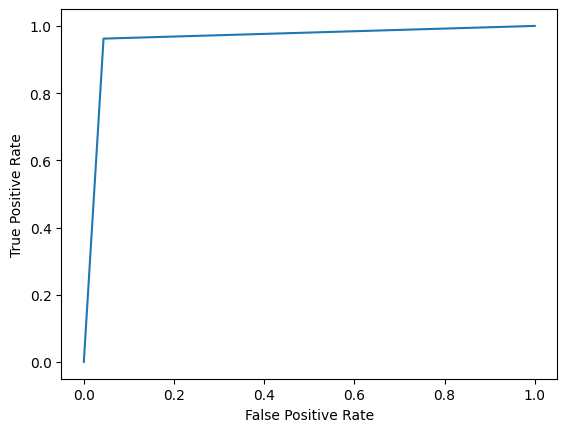

AUC: 0.959


In [81]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

# Naive Bayes Model

In [82]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = gnb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9222058099458394


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# ROC Curve

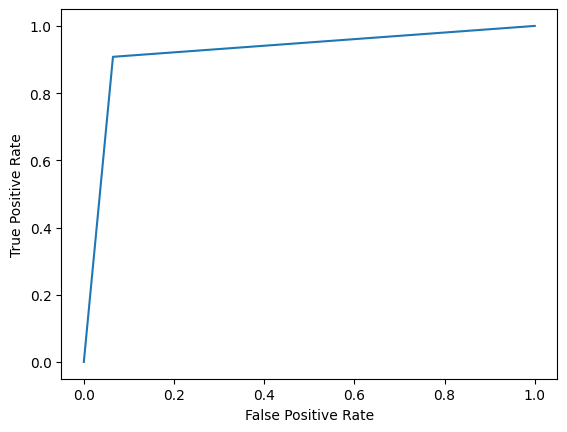

AUC: 0.922


In [84]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

# **Inferences**



For Multi Layer Perceptron model, it is **overfit**

According to accuracy, **SVM Model** is the best


# **Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

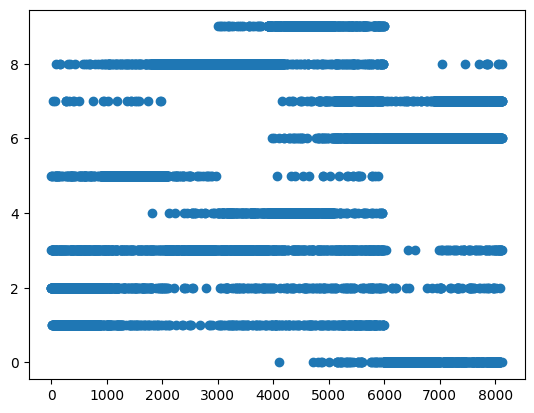

In [110]:
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= 10)

label = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
means = pd.DataFrame(label)

n = len(X.index)
fig = plt.figure()
ax = fig.add_subplot(111)
arr = []
for i in range(n):
  arr.append(i+1)
print(arr)
scatter = ax.scatter(arr,label)
plt.show()



